In [1]:
import pandas as pd

In [2]:
#LOAD PIMA INDIASN DATASET
url='https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(url)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# feature matrix X/target vector Y
y=pima.label

In [4]:
x=pima.drop('label',axis=1)
x.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
#import and instantiate a knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn_clf=KNeighborsClassifier()

## Grid Search efficiently to find the optimal model hyper parameters


In [7]:
# define the parameter values that should be searched
k= list(range(1,51))
k

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [8]:
# create a parameter dictionary
parameter_dic={'n_neighbors':k}


In [9]:
##import GridSearchCV
from sklearn.model_selection import GridSearchCV

## For each parameter value we will do a cross validation and check for accuracy

In [10]:
grid = GridSearchCV(knn_clf, #model
                    parameter_dic,
                    cv=10,#number of folds
                    scoring='accuracy', #evaluation metric:accuracy ,recall,precision
                    verbose=1, #optional
                    n_jobs=-1 #incase your computer has more than one cpu use all of them
                   )

In [11]:
grid.fit(x,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [16]:
##put the reults into a dataframe
pd.DataFrame=(grid.cv_results_)[['mean_test_score','params']]

TypeError: unhashable type: 'list'

In [17]:
#examine best model hyoer parameter
grid.best_score_

0.7552973342447027

In [18]:
grid.best_params_

{'n_neighbors': 17}

In [19]:
#best classifier
best_clf=grid.best_estimator_

## searching multiple parameters simultaneously
knn hyperparameters:n_neighbors, weights ('uniform',"distance")

In [20]:
parameters_dic={'n_neighbors':k,'weights':['uniform','distance']}

In [21]:
grid=GridSearchCV(knn_clf,
                 parameters_dic,
                 cv=10,
                 verbose=1,
                 n_jobs=-1)
grid.fit(x,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [22]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.679665,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.679665,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.712235,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.679665,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.703059,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...
95,0.744891,"{'n_neighbors': 48, 'weights': 'distance'}"
96,0.731921,"{'n_neighbors': 49, 'weights': 'uniform'}"
97,0.743575,"{'n_neighbors': 49, 'weights': 'distance'}"
98,0.722796,"{'n_neighbors': 50, 'weights': 'uniform'}"


In [23]:
grid.best_score_

0.7552973342447027

In [24]:
grid.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [25]:
best_clf=grid.best_estimator_

In [26]:
## randomized search on hyperparameters

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
grid = RandomizedSearchCV(knn_clf,
                         parameters_dic,
                         cv=10,scoring='accuracy',
                         n_iter=20, #number of parameters that are sampled
                         verbose=1,
                         n_jobs=-1)
grid.fit(x,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [29]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.747368,"{'weights': 'uniform', 'n_neighbors': 12}"
1,0.752614,"{'weights': 'uniform', 'n_neighbors': 16}"
2,0.737064,"{'weights': 'uniform', 'n_neighbors': 33}"
3,0.744805,"{'weights': 'uniform', 'n_neighbors': 15}"
4,0.742293,"{'weights': 'distance', 'n_neighbors': 21}"
5,0.744839,"{'weights': 'distance', 'n_neighbors': 14}"
6,0.735714,"{'weights': 'uniform', 'n_neighbors': 6}"
7,0.746138,"{'weights': 'distance', 'n_neighbors': 32}"
8,0.739679,"{'weights': 'distance', 'n_neighbors': 9}"
9,0.746189,"{'weights': 'uniform', 'n_neighbors': 20}"


In [30]:
grid.best_score_

0.7552802460697198

In [31]:
grid.best_params_

{'weights': 'uniform', 'n_neighbors': 18}

In [32]:
##  Example

In [33]:
url ='https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/abalone.csv'
abalone= pd.read_csv(url)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**goal:** to predict age (rings) based on physical measurements


<AxesSubplot:>

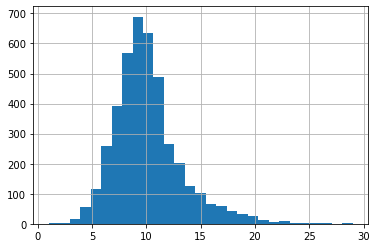

In [34]:
#rings distribution
abalone.Rings.unique()
abalone.Rings.hist(bins=29)

In [35]:
# to dimplify the problem, lets create age bins
def age_bin(age):
    if age<5:
        return "<=5"
    elif age<=10:
        return'6-10'
    elif age<=15:
        return '11-15'
    else:
        return '>15'


In [36]:
abalone['Rings']=abalone.Rings.apply(age_bin)

In [54]:
y=abalone.Rings
x=abalone.drop(['Rings','Sex'],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [57]:
grid=GridSearchCV(knn_clf,
                 parameters_dic,
                 cv=10,
                  scoring='accuracy',
                 verbose=1,
                 n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [58]:
grid.best_score_

0.7263649498382206

In [59]:
best_clf=grid.best_estimator_

In [60]:
y_test_pred=best_clf.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [62]:
confusion_matrix(y_test,y_test_pred)

array([[133, 141,   0,   2],
       [ 83, 592,   5,   1],
       [  0,  11,   9,   0],
       [ 58,   8,   0,   2]], dtype=int64)

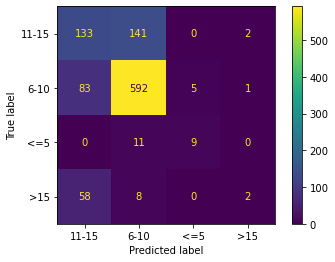

In [63]:
plot_confusion_matrix(best_clf,x_test,y_test)